## 作業
畫出 16 個 bin 的顏色直方圖,並嘗試回答每個 channel 在 [16, 32] 這個 bin 中有多少個 pixel？

In [2]:
import os
import keras
os.environ["CUDA_VISIBLE_DEVICES"] = "" # 使用 CPU

# import cv2 # 載入 cv2 套件
import matplotlib.pyplot as plt

train, test = keras.datasets.cifar10.load_data()

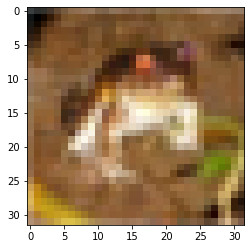

In [3]:
from PIL import Image
image_array = train[0][0] # 讀取圖片

image = Image.fromarray(image_array)
plt.imshow(image)
plt.show()

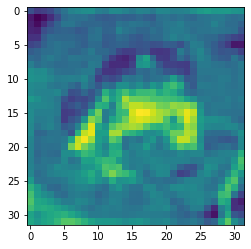

In [4]:
# 把彩色的圖片轉為灰度圖
gray = image.convert("L")
plt.imshow(gray)
plt.show()

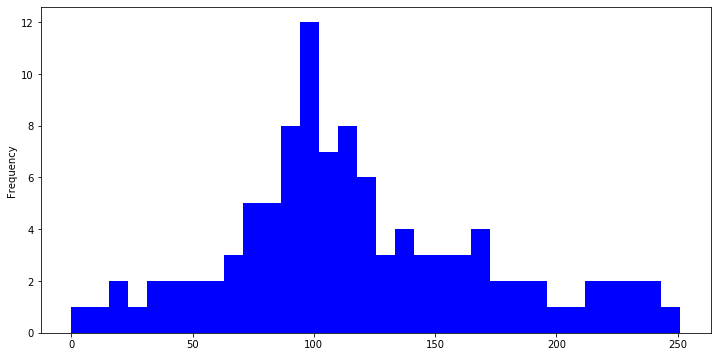

In [82]:
import numpy as np
import pandas as pd
a = np.asarray(gray)
df_gray = pd.DataFrame(a)

df_gray.plot(kind="hist",figsize=(12,6),bins=32, legend = False, color="blue")

Text(0, 0.5, 'Numbers')

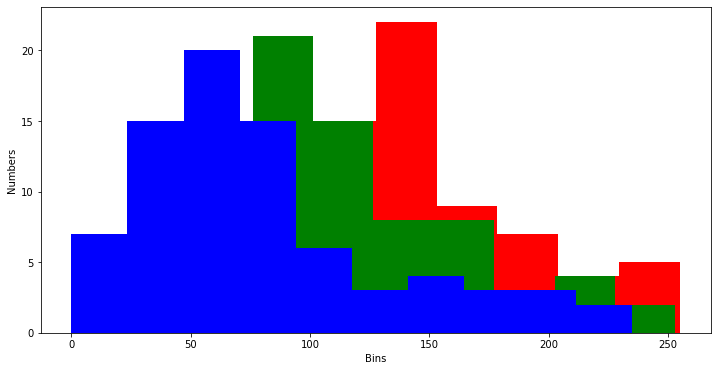

In [85]:
df_r = pd.DataFrame(image_array[:,:,0])
df_g = pd.DataFrame(image_array[:,:,1])
df_b = pd.DataFrame(image_array[:,:,2])

fig, ax = plt.subplots(1, figsize=(12,6))
df_r.plot(kind="hist", ax=ax, legend=False, color="red")     
df_g.plot(kind="hist", ax=ax, legend=False, color="green")     
df_b.plot(kind="hist", ax=ax, legend=False, color="blue")
ax.set_xlabel("Bins")
ax.set_ylabel("Numbers")

In [95]:
bins=[0,16,32,256]

r_pixels = df_r.apply(lambda x: pd.cut(x, bins).value_counts()[1])
print("pixel number of R channel in (16~32)={}".format(r_pixels.sum()))

g_pixels = df_g.apply(lambda x: pd.cut(x, bins).value_counts()[1])
print("pixel number of G channel in (16~32)={}".format(g_pixels.sum()))

b_pixels = df_b.apply(lambda x: pd.cut(x, bins).value_counts()[1])
print("pixel number of B channel in (16~32)={}".format(b_pixels.sum()))

pixel number of R channel in (16~32)=2
pixel number of G channel in (16~32)=5
pixel number of B channel in (16~32)=37
